![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
crimes = pd.read_csv("crimes.csv")
crimes.head()

DR_NO   Date Rptd  ...  Status Desc                                 LOCATION
0  220314085  2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040  2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831  2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725  2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256  2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

In [37]:
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB
None


In [38]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [42]:

crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'], errors='coerce')
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'], errors='coerce')

crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

In [44]:
crimes = crimes.dropna(subset = ['Date Rptd','DATE OCC'])
print(crimes.describe)

<bound method NDFrame.describe of             DR_NO  ...                                  LOCATION
0       220314085  ...   2500 S  SYCAMORE                     AV
1       222013040  ...   3300    SAN MARINO                   ST
2       220614831  ...                         1900    TRANSIENT
3       231207725  ...   6200    4TH                          AV
4       220213256  ...   1200 W  7TH                          ST
...           ...  ...                                       ...
185710  231510379  ...   5300    DENNY                        AV
185711  231604807  ...  12500    BRANFORD                     ST
185712  231606525  ...  12800    FILMORE                      ST
185713  231210064  ...   6100 S  VERMONT                      AV
185714  230906458  ...  14500    HARTLAND                     ST

[185715 rows x 12 columns]>


**Crime Trends Over time**

In [48]:
crimes['Year'] = crimes['DATE OCC'].dt.year
crimes['Month'] = crimes['DATE OCC'].dt.month
crimes.head()

DR_NO  Date Rptd  ...  Year  Month
0  220314085 2022-07-22  ...  2020      5
1  222013040 2022-08-06  ...  2020      6
2  220614831 2022-08-18  ...  2020      8
3  231207725 2023-02-27  ...  2020      1
4  220213256 2022-07-14  ...  2020      7

[5 rows x 14 columns]

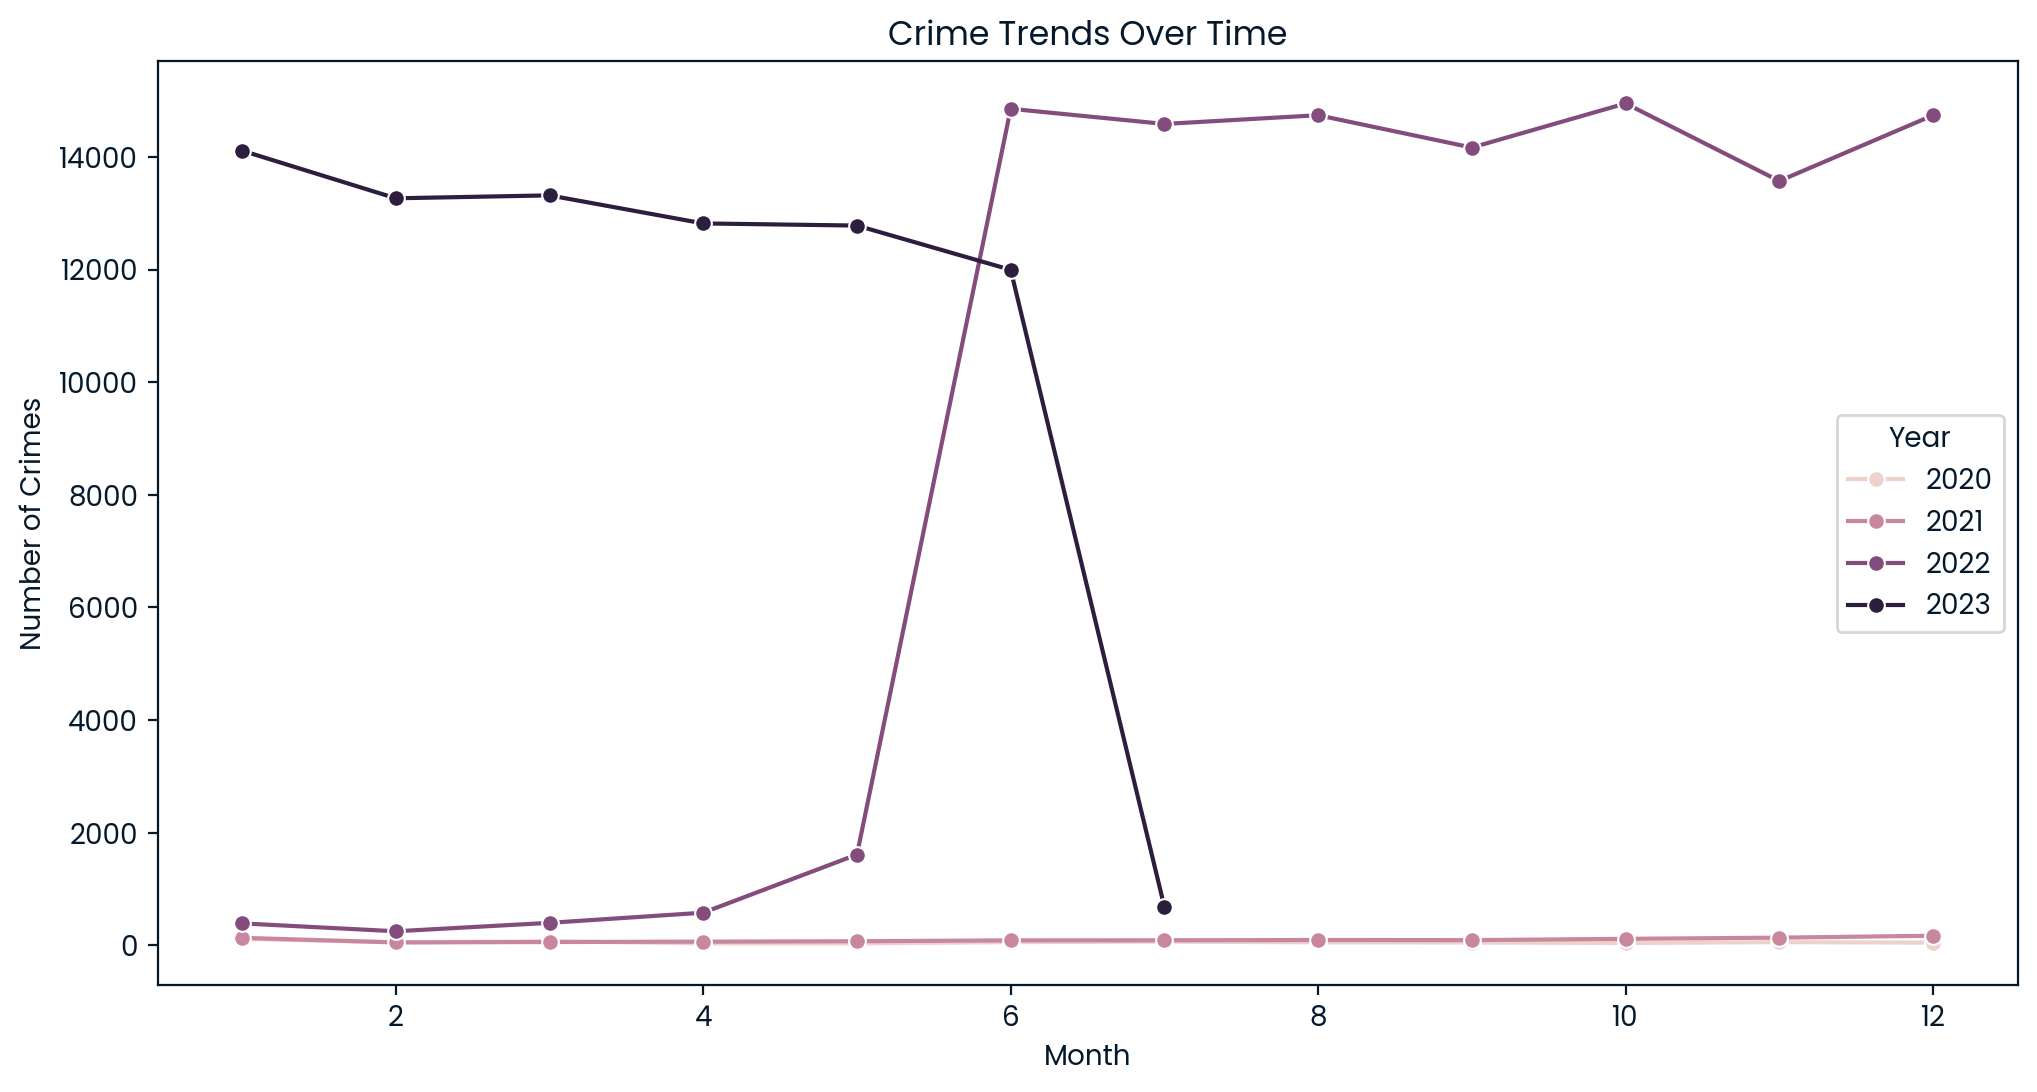

In [52]:
crime_trend = crimes.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend, x='Month', y='Crime Count', hue='Year', marker='o')
plt.title('Crime Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Year')
plt.show()


# Crime by **Area**

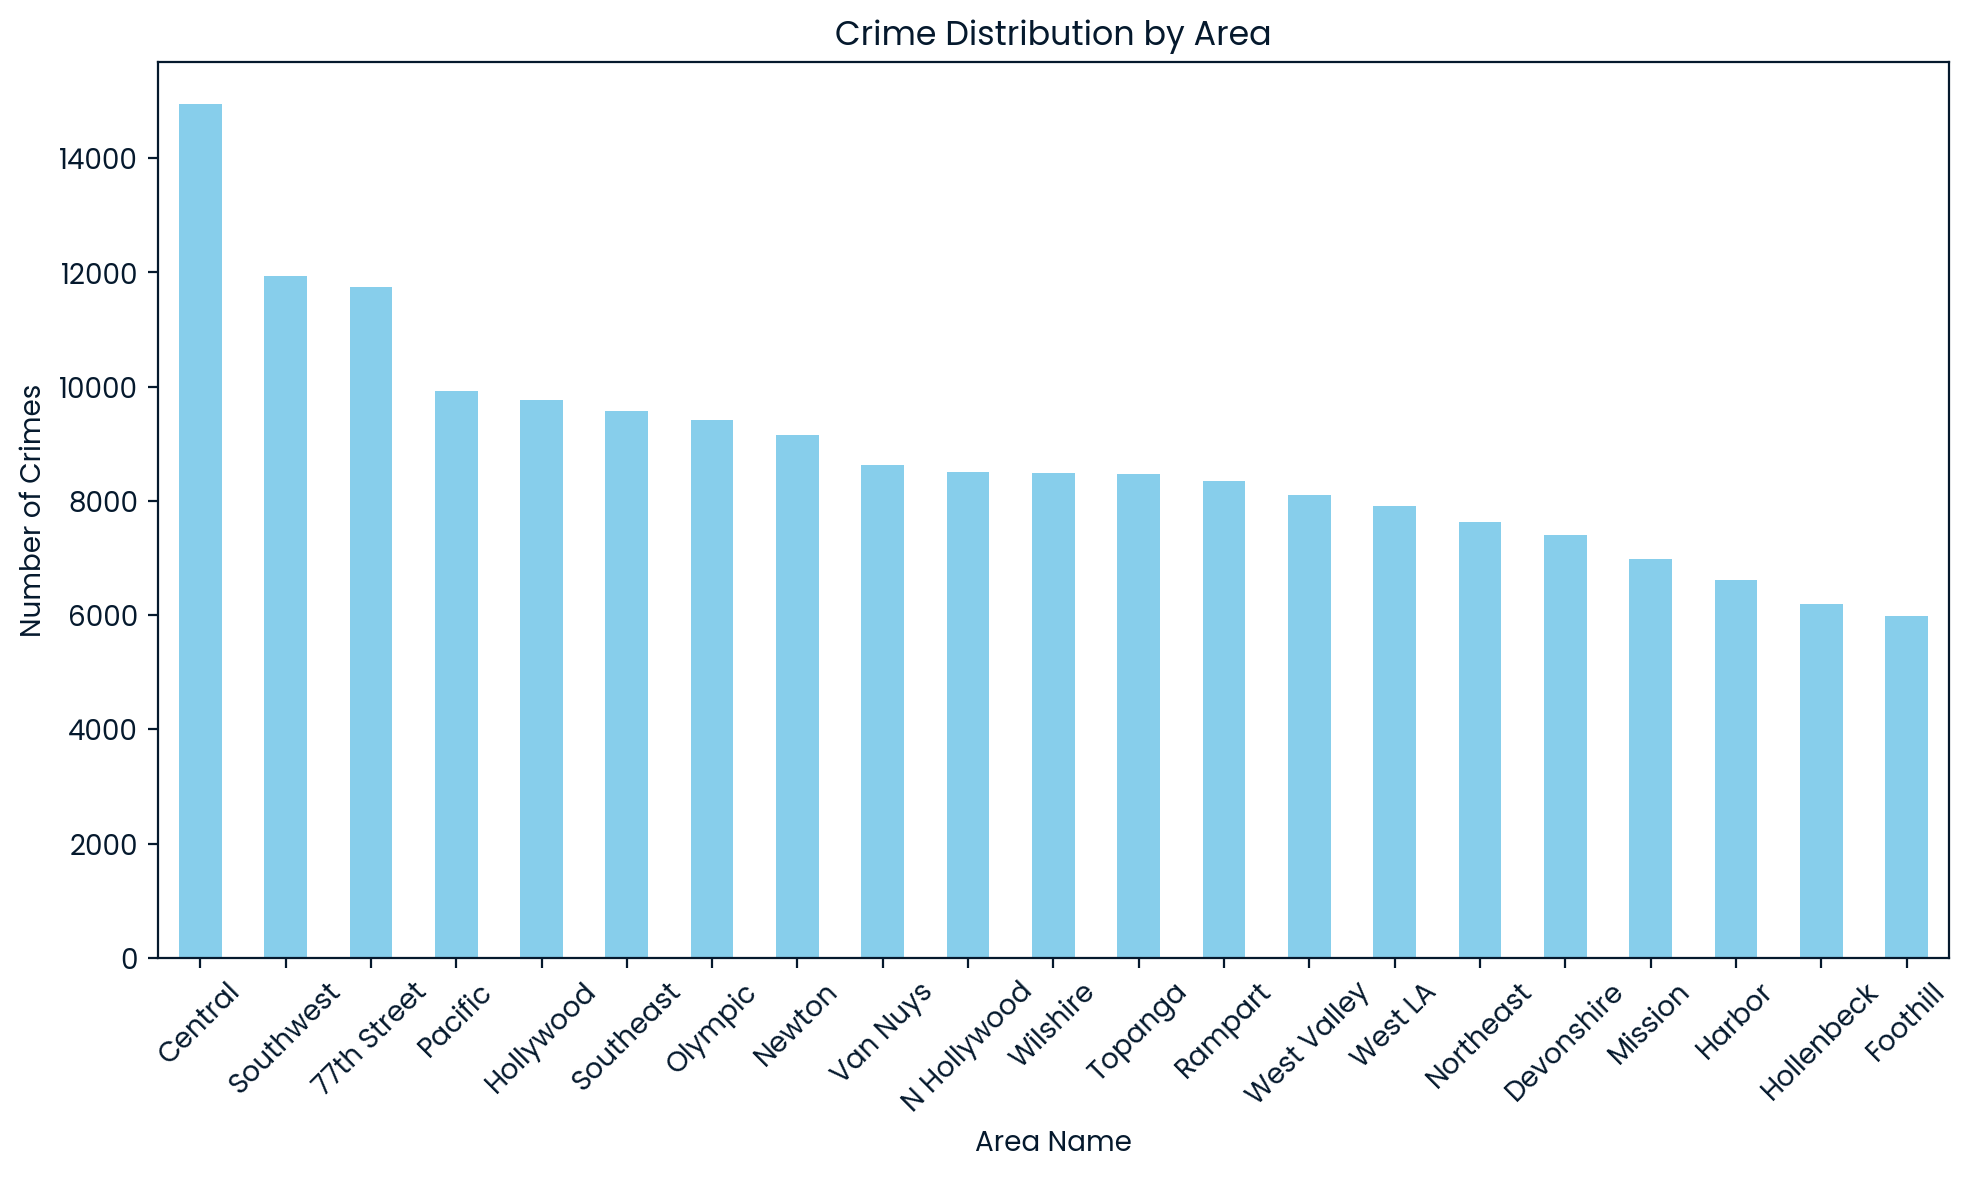

In [53]:

area_crime_count = crimes['AREA NAME'].value_counts()

plt.figure(figsize=(10, 6))
area_crime_count.plot(kind='bar', color='skyblue')
plt.title('Crime Distribution by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **WEAPON ANALYSIS**

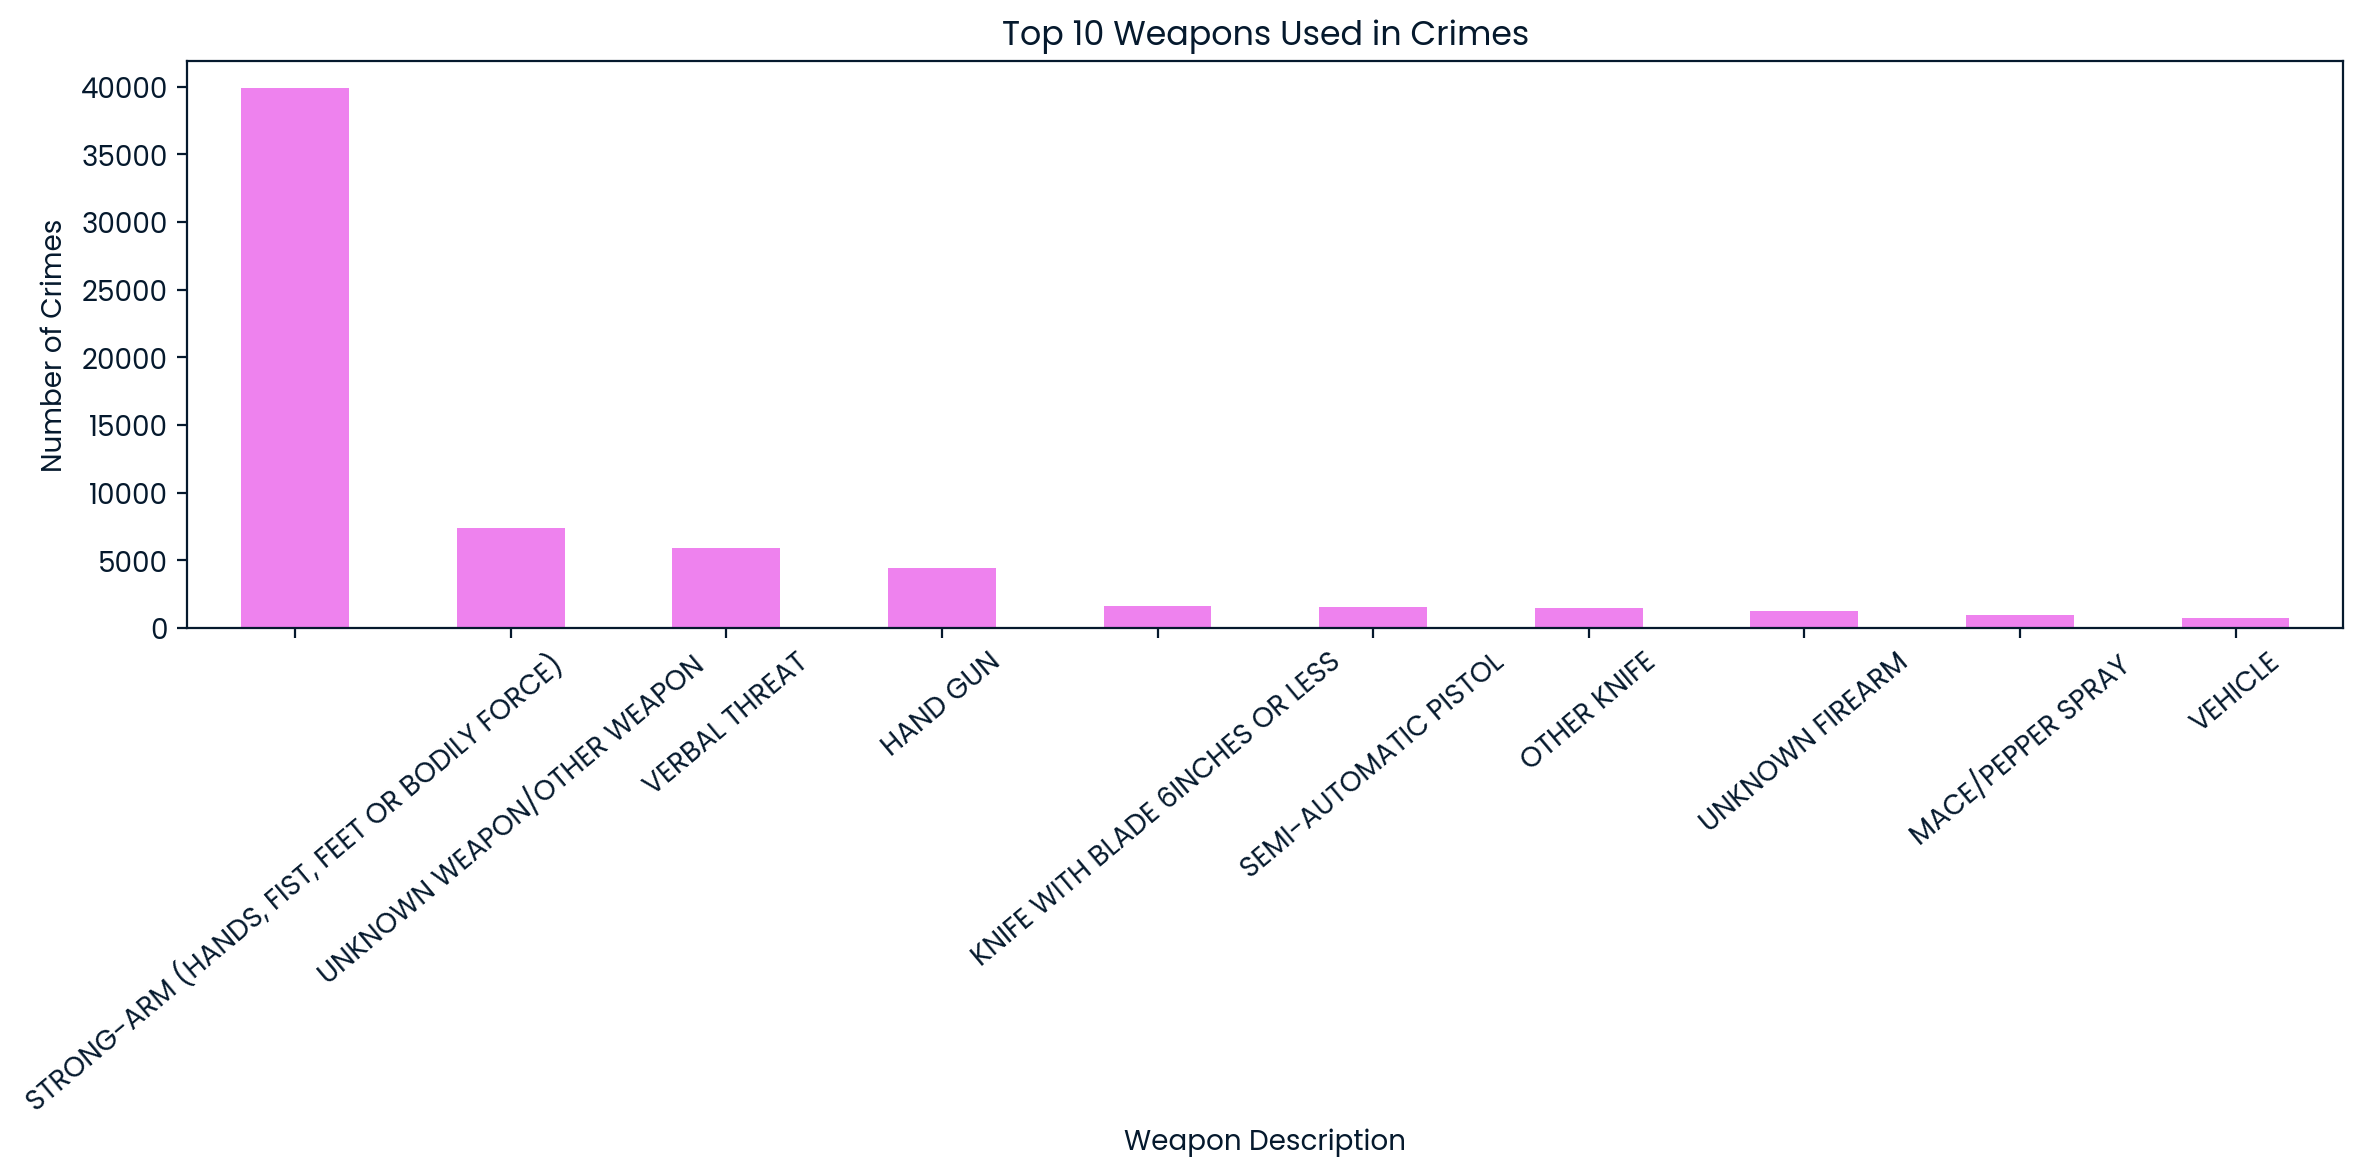

In [56]:
weapon = crimes['Weapon Desc'].value_counts()

plt.figure(figsize=(12, 6))
weapon.head(10).plot(kind='bar', color='Violet')
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Weapon Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


# **Victim's Demographic Analysis**

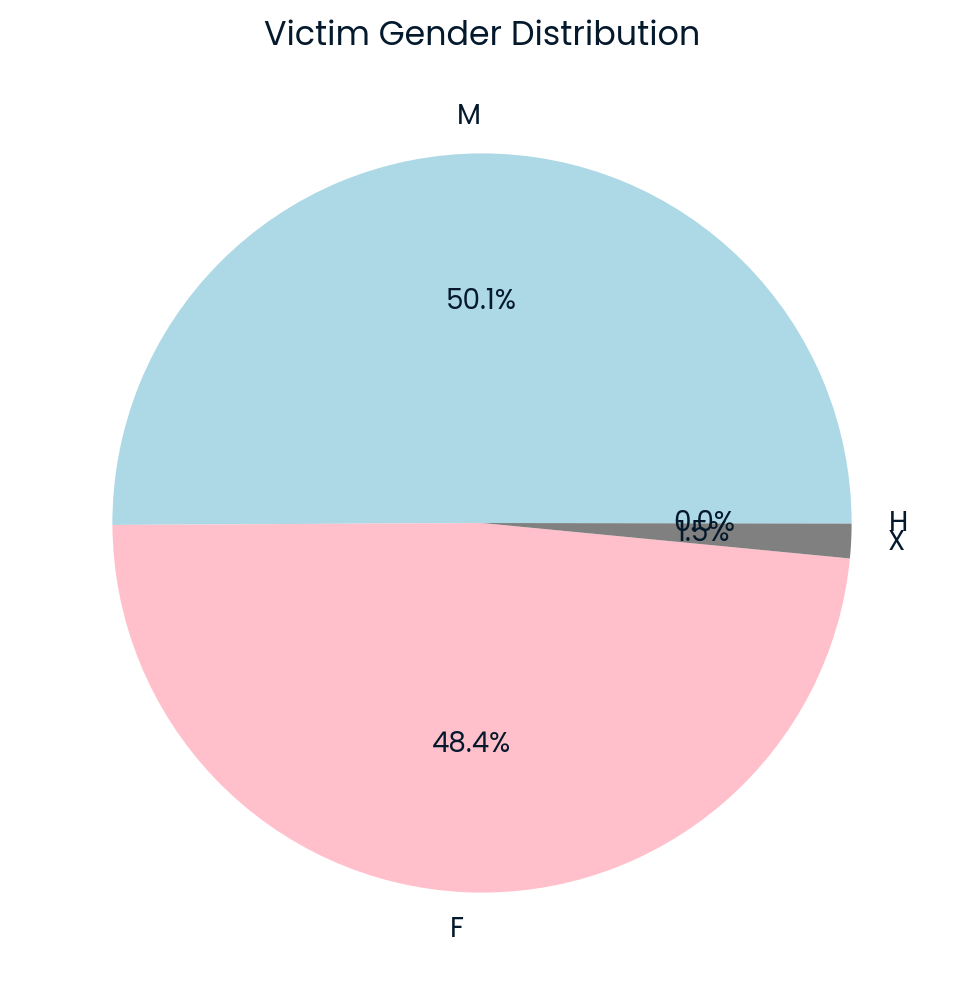

In [58]:
gender = crimes['Vict Sex'].value_counts()

plt.figure(figsize=(6, 6))
gender.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'gray'])
plt.title('Victim Gender Distribution')
plt.ylabel('')
plt.show()

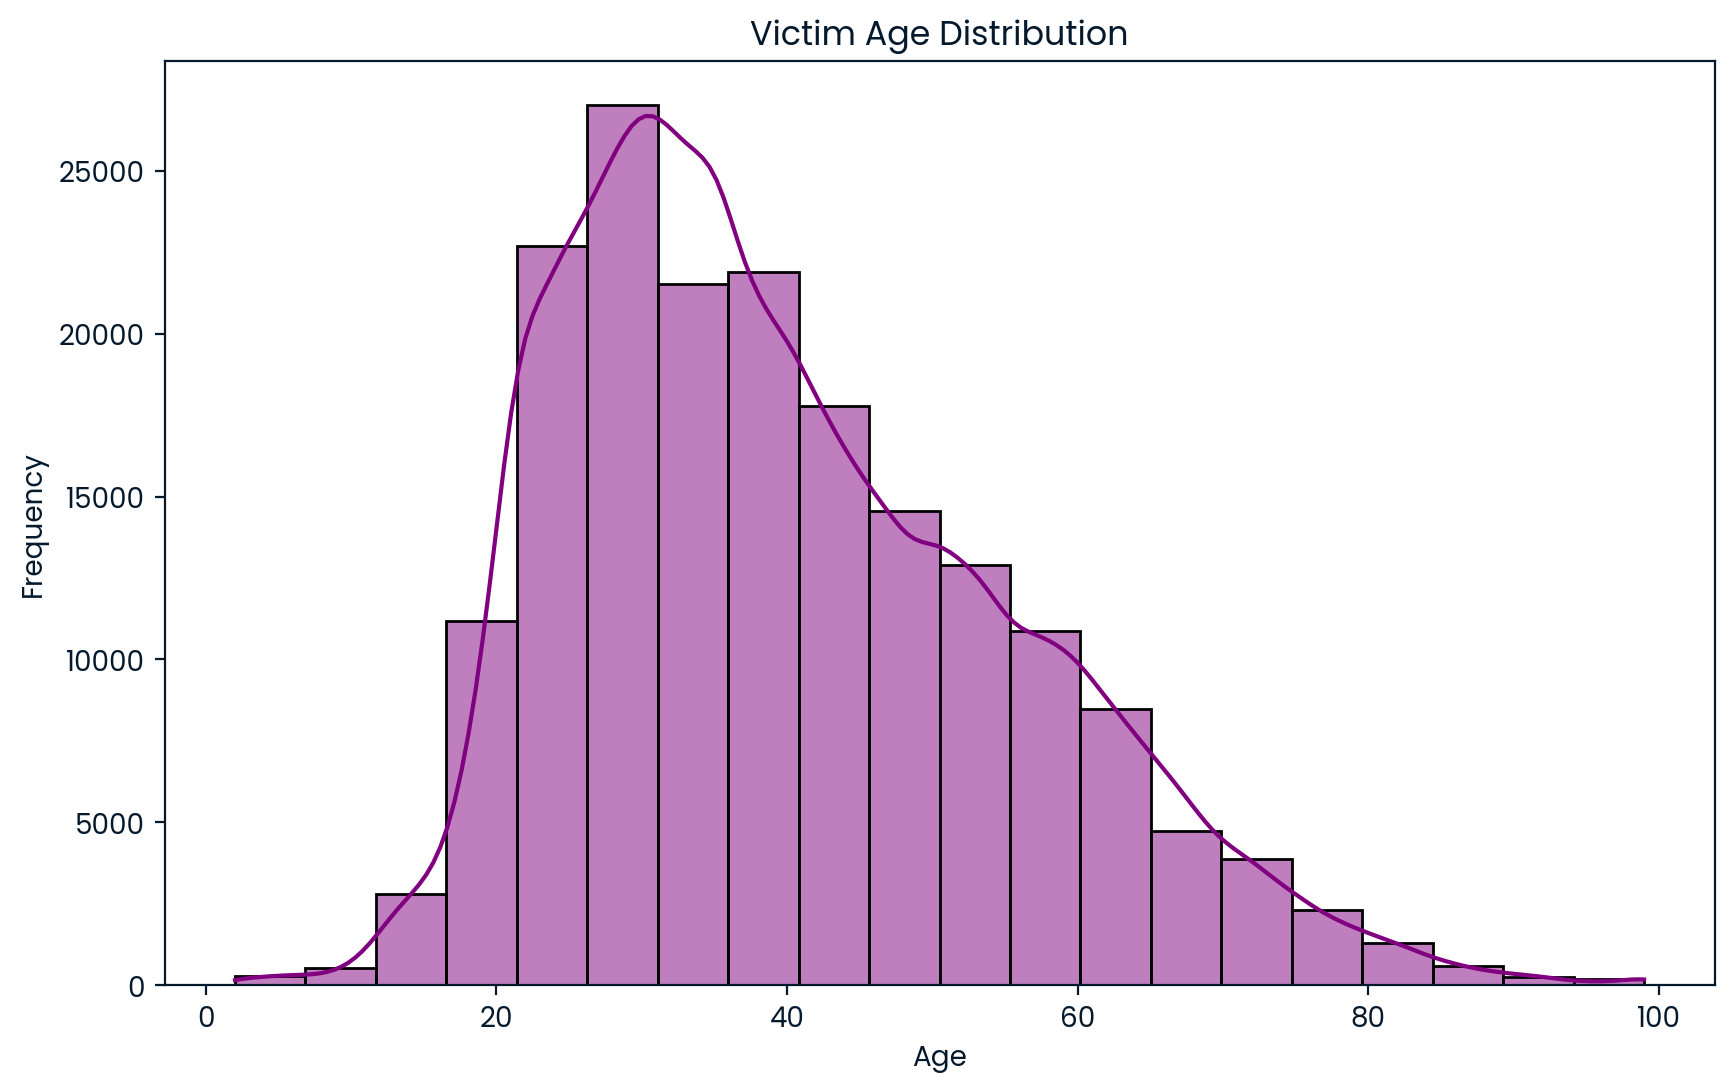

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(crimes['Vict Age'], bins=20, kde=True, color='purple')
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

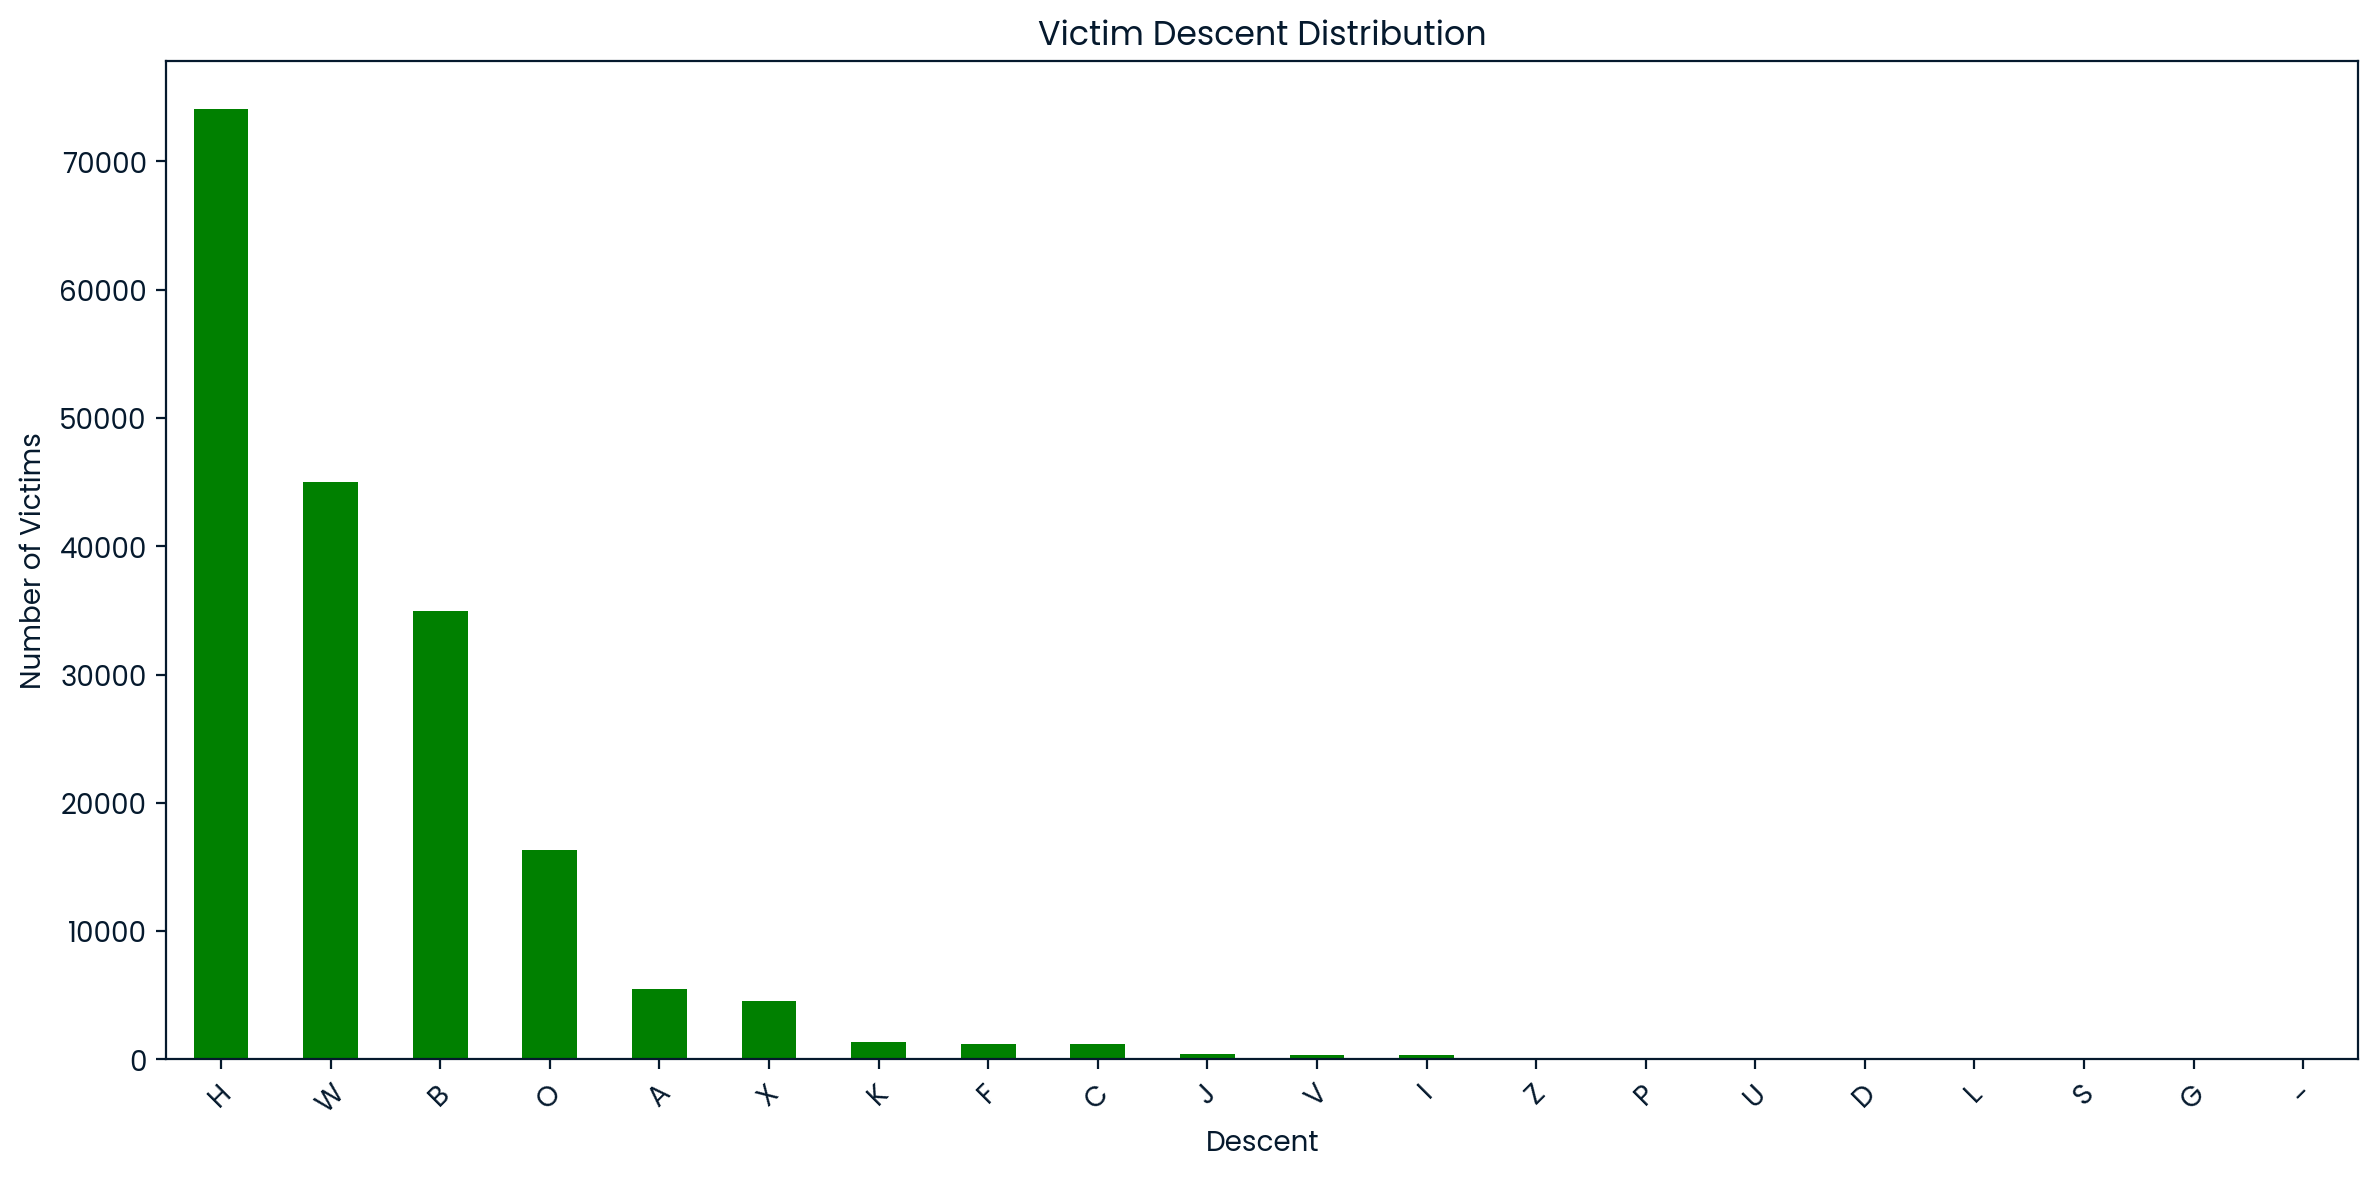

In [62]:
descent_distribution = crimes['Vict Descent'].value_counts()
plt.figure(figsize=(12, 6))
descent_distribution.plot(kind='bar', color='green')
plt.title('Victim Descent Distribution')
plt.xlabel('Descent')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

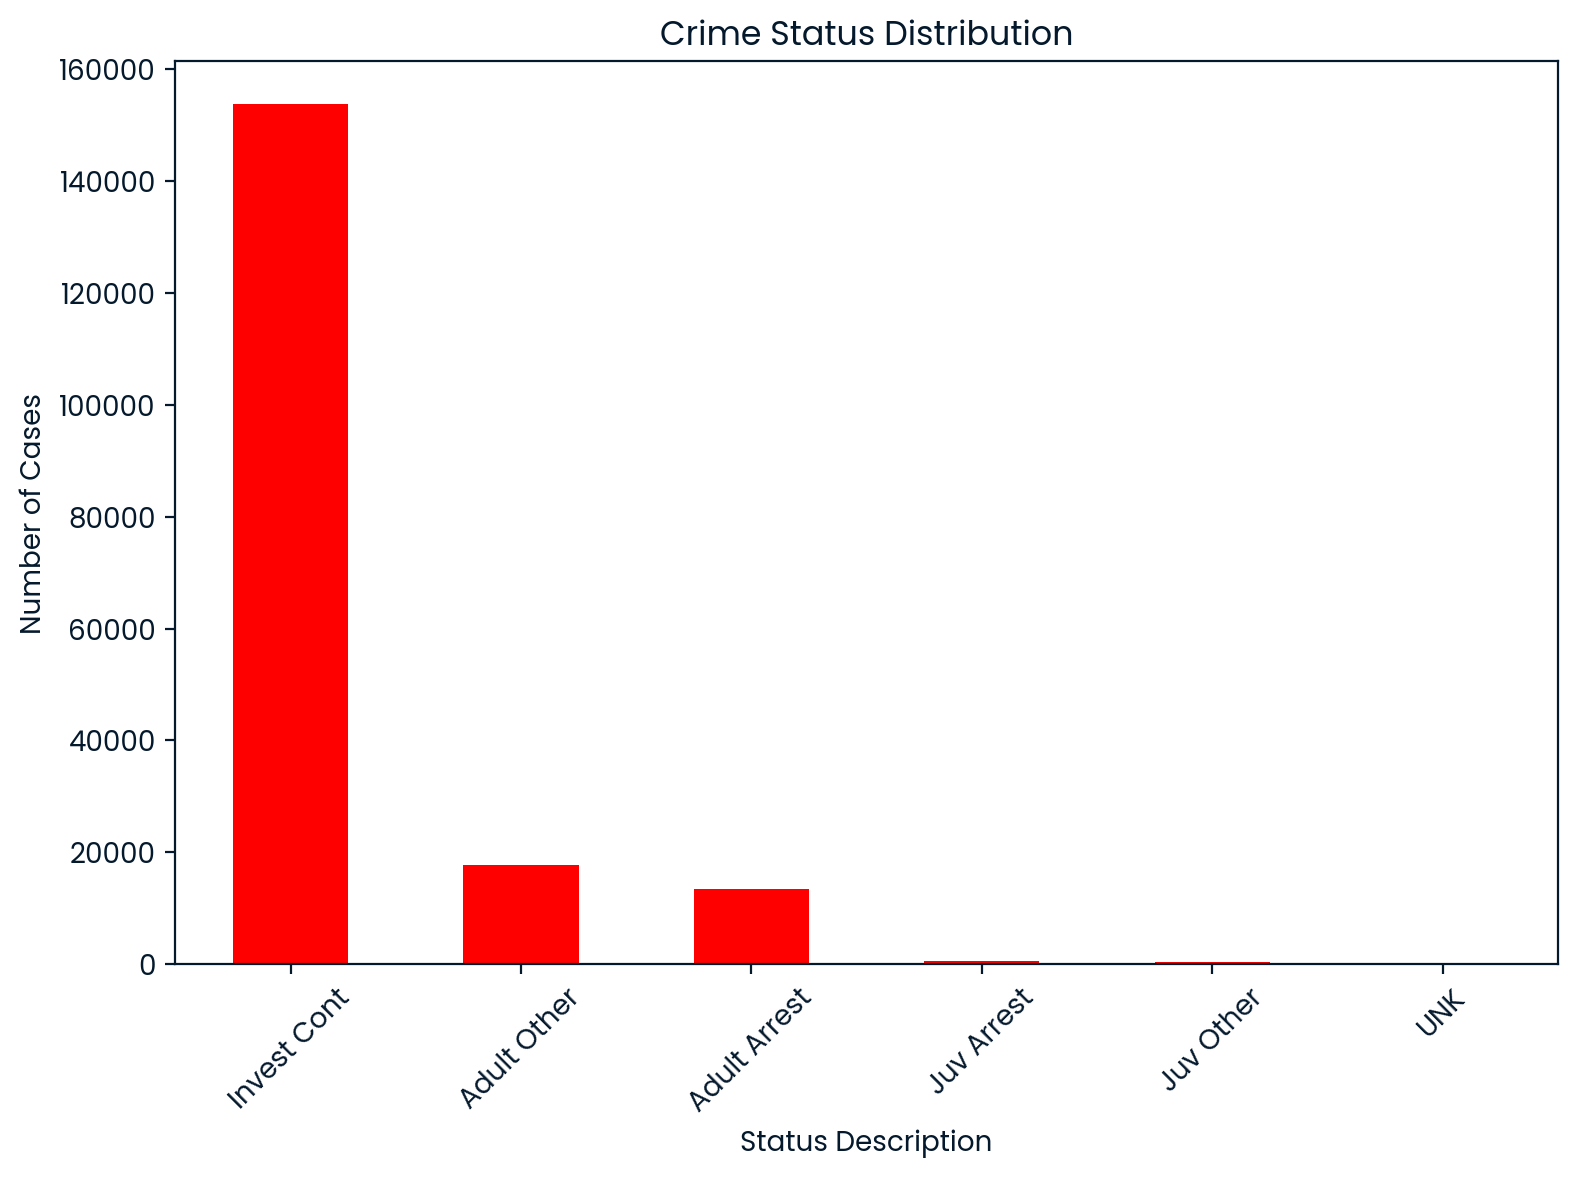

In [63]:
# Crime status
status_distribution = crimes['Status Desc'].value_counts()

# Plot crime resolution status
plt.figure(figsize=(8, 6))
status_distribution.plot(kind='bar', color='red')
plt.title('Crime Status Distribution')
plt.xlabel('Status Description')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Create a map centered on Los Angeles
m = folium.Map(location=[34.05, -118.25], zoom_start=12)

# Check if latitude and longitude columns exist
if 'LAT' in crimes.columns and 'LON' in crimes.columns:
    # Prepare data for the heatmap
    heat_data = data[['LAT', 'LON']].dropna().values.tolist()
    
    # Add heatmap layer
    HeatMap(heat_data).add_to(m)

# Display the map inline
display(m)
